# Analisis de datos de comercio internacional en venezuela, por año y seccion

``` primeramente importamos la libreria pandas y visualizamos la tabla de los datos extraidos```

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fuente de Datos 📊

Los datos utilizados en este análisis fueron extraídos de [The Observatory of Economic Complexity (OEC)](https://oec.world/en/visualize/tree_map/hs96/import/ven/all/show), una plataforma reconocida mundialmente que:

- Proporciona datos económicos detallados y confiables
- Es utilizada por investigadores y analistas en todo el mundo
- Actualiza sus datos regularmente desde fuentes oficiales
- Permite la visualización y análisis de flujos comerciales internacionales

> **Nota**: La veracidad de los datos está respaldada por la reputación de OEC como una fuente confiable de estadísticas comerciales internacionales Y nuestro Grupo de proyecto ve viable los datos de OEC para el análisis de comercio internacional en Venezuela.

In [56]:
datos = pd.read_csv("download.csv")
datos

,HS2,HS2 ID,HS4,HS4 ID,Section,Section ID,Trade Value,Year
0,Live animals,101,Horses,10101,Animal Products,1,518867.0,2002
1,Live animals,101,Bovine,10102,Animal Products,1,526840.0,2002
2,Live animals,101,Pigs,10103,Animal Products,1,381069.0,2002
3,Live animals,101,Sheep and Goats,10104,Animal Products,1,3879.0,2002
4,Live animals,101,Poultry,10105,Animal Products,1,8445907.0,2002
...,...,...,...,...,...,...,...,...
24159,Misc. manufactures,2096,Mannequins,209618,Miscellaneous,20,488752.0,2022
24160,Art & antiques,2197,Paintings,219701,Arts and Antiques,21,1325580.0,2022
24161,Art & antiques,2197,Prints,219702,Arts and Antiques,21,49680.0,2022
24162,Art & antiques,2197,Sculptures,219703,Arts and Antiques,21,848679.0,2022


# Limpieza y Preparación de Datos 🧹

En esta sección realizaremos:

1. Análisis inicial de los datos
   - Revisión de datos faltantes
   - Tipos de datos presentes
   
2. Proceso de limpieza
   - Selección de columnas relevantes
   - Eliminación de valores nulos
   - Conversión de tipos de datos
   
3. Verificación de resultados
   - Resumen del DataFrame limpio
   - Estadísticas básicas

> **Nota**: Este proceso es fundamental para asegurar la calidad y consistencia de nuestro análisis posterior, sobre todo para evitar errores en los resultados o datos incompletos. 




In [57]:
# Primero veamos un resumen de los datos faltantes y tipos de datos
print("Información del DataFrame original:")
print(datos.info())
print("\nDatos faltantes por columna:")
print(datos.isnull().sum())


Información del DataFrame original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24164 entries, 0 to 24163
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HS2          24164 non-null  object 
 1   HS2 ID       24164 non-null  int64  
 2   HS4          24164 non-null  object 
 3   HS4 ID       24164 non-null  int64  
 4   Section      24164 non-null  object 
 5   Section ID   24164 non-null  int64  
 6   Trade Value  24164 non-null  float64
 7   Year         24164 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB
None

Datos faltantes por columna:
HS2            0
HS2 ID         0
HS4            0
HS4 ID         0
Section        0
Section ID     0
Trade Value    0
Year           0
dtype: int64


In [27]:
# Eliminamos todos los datos faltantes y columnas innecesarias
columnas_a_mantener = ['HS2', 'HS4', 'Section', 'Trade Value', 'Year']
datos_limpios = datos[columnas_a_mantener]
datos_limpios = datos_limpios.dropna()

# Asegurar que Trade Value sea numérico
datos_limpios['Trade Value'] = pd.to_numeric(datos_limpios['Trade Value'], errors='coerce')
# Resetear índices
datos_limpios = datos_limpios.reset_index(drop=True)

datos = datos_limpios

In [29]:
print("Información del DataFrame limpio:")
print(datos_limpios.info())
print("Primeras filas del DataFrame limpio:")
display(datos_limpios.head())

# Resumen estadístico básico
print("Resumen estadístico de Trade Value:")
print(datos_limpios['Trade Value'].describe())

Información del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18372 entries, 0 to 18371
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HS2          18372 non-null  object 
 1   HS4          18372 non-null  object 
 2   Section      18372 non-null  object 
 3   Trade Value  18372 non-null  float64
 4   Year         18372 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 717.8+ KB
None
Primeras filas del DataFrame limpio:


,HS2,HS4,Section,Trade Value,Year
0,Live animals,Horses,Animal Products,518867.0,2002
1,Live animals,Bovine,Animal Products,526840.0,2002
2,Live animals,Pigs,Animal Products,381069.0,2002
3,Live animals,Sheep and Goats,Animal Products,3879.0,2002
4,Live animals,Poultry,Animal Products,8445907.0,2002


Resumen estadístico de Trade Value:
count    1.837200e+04
mean     2.346292e+06
std      3.136428e+06
min      1.000000e+00
25%      1.446652e+05
50%      8.852430e+05
75%      3.357014e+06
max      1.308498e+07
Name: Trade Value, dtype: float64


```aqui hacemos una pequeña pausa para visualizar los años y asi poder verificar que esten todos los años presentes ```

In [30]:
Años = pd.DataFrame(datos['Year'].unique(), columns=['Año'])
print("Años en los datos:")
display(Años)

Años en los datos:


,Año
0,2002
1,2003
2,2004
3,2005
4,2006
5,2007
6,2008
7,2009
8,2010
9,2011


# Análisis Exploratorio de Datos: Año 2022

## Objetivo
En esta sección realizaremos un análisis exploratorio inicial de los datos correspondientes al año 2022, con el fin de evaluar la calidad y utilidad de la información disponible para nuestro estudio.

## Aspectos a Analizar
1. Distribución por secciones comerciales
2. Identificación de productos/categorías principales
3. Valores totales y promedios por sección
4. Visualización de patrones generales

Este análisis nos permitirá:
- Comprender la estructura general de los datos
- Identificar tendencias importantes
- Validar la consistencia de la información
- Establecer una base para análisis más profundos

A continuación, procederemos con el análisis detallado de los datos del 2022.


In [31]:
# Obtener las secciones únicas y crear un DataFrame con ellas
secciones_unicas = pd.DataFrame(datos['Section'].unique(), columns=['Secciones'])
print("Secciones únicas en los datos:")
display(secciones_unicas)

Secciones únicas en los datos:


,Secciones
0,Animal Products
1,Vegetable Products
2,Animal and Vegetable Bi-Products
3,Foodstuffs
4,Mineral Products
5,Chemical Products
6,Plastics and Rubbers
7,Animal Hides
8,Wood Products
9,Paper Goods


In [36]:
datos_2022 = datos[datos['Year'] == 2022]

# Agrupar por Section y sumar los valores
analisis_por_seccion = datos_2022.groupby('Section')['Trade Value'].agg([
    ('Total', 'sum'),
    ('Promedio', 'mean'),
    ('Cantidad_Registros', 'count')
]).round(2)

print("\nAnálisis por sección para 2022:")
display(analisis_por_seccion)


Análisis por sección para 2022:


,Total,Promedio,Cantidad_Registros
Section,,,
Animal Hides,3130470.0,223605.00,14
Animal Products,62864786.0,1746244.06,36
Animal and Vegetable Bi-Products,23506667.0,2136969.73,11
Arts and Antiques,5428665.0,1357166.25,4
Chemical Products,261700125.0,1896377.72,138
Foodstuffs,84429335.0,2723526.94,31
Footwear and Headwear,33566687.0,2237779.13,15
Instruments,78985467.0,1611948.31,49
Machines,255524231.0,2689728.75,95


In [41]:
# Encontrar los principales productos/categorías por valor
top_productos = datos_2022.nlargest(10, 'Trade Value')[['Section', 'HS2', 'Trade Value']]
print("Top 10 productos/categorías por valor en 2022:")
display(top_productos)

Top 10 productos/categorías por valor en 2022:


,Section,HS2,Trade Value
17985,Footwear and Headwear,Footwear,13066408.0
17968,Textiles,Non-knitted clothing accesories,12967487.0
17743,Chemical Products,"Glues, starches, & albuminoid products",12798830.0
18099,Metals,Iron or steel articles,12775166.0
17881,Textiles,Cotton,12636726.0
17661,Chemical Products,Inorganic chemicals,12624504.0
18164,Metals,Miscellaneous metal products,12416073.0
17792,Plastics and Rubbers,Rubber & articles thereof,12399371.0
17724,Chemical Products,"Paints, dyes, & varnishes",12396893.0
17857,Paper Goods,Paper articles,12388550.0


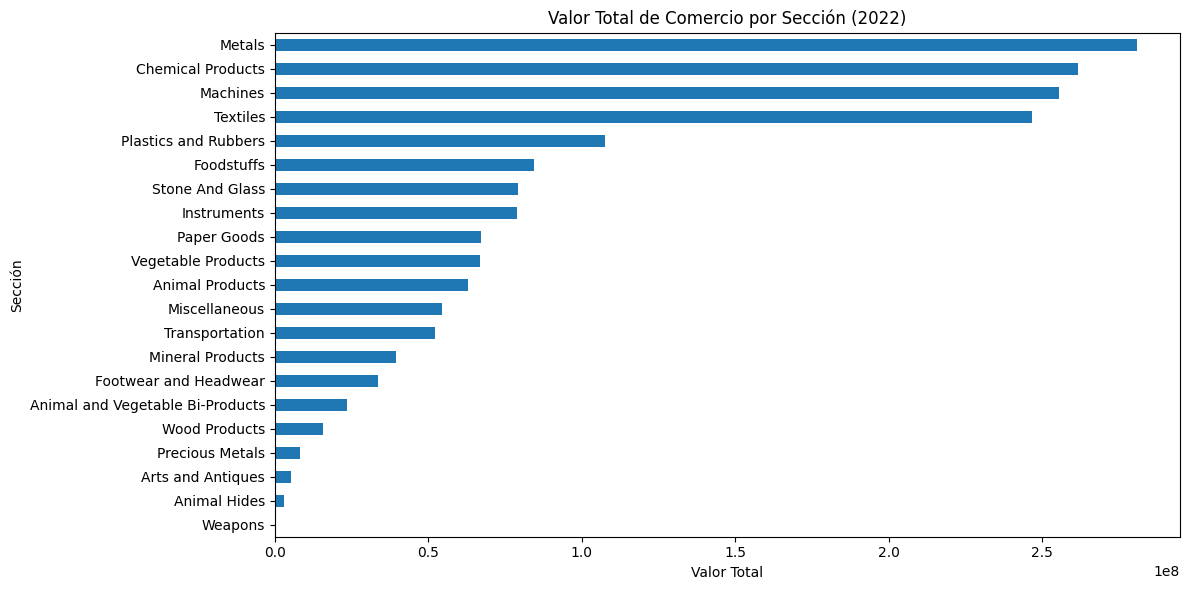

In [40]:
# visualizamos la demanda general por seccion
plt.figure(figsize=(12, 6))
analisis_por_seccion['Total'].sort_values(ascending=True).plot(kind='barh')
plt.title('Valor Total de Comercio por Sección (2022)')
plt.xlabel('Valor Total')
plt.ylabel('Sección')
plt.tight_layout()
plt.show()

# Análisis Temporal y Global del Comercio Internacional en venezuela

## Análisis por Año
En esta sección examinaremos la evolución temporal del comercio, incluyendo:
- Valor total de comercio por año
- Promedio de transacciones
- Cantidad de registros comerciales
- Tendencias y patrones a lo largo del tiempo

## Análisis Global
Posteriormente realizaremos un análisis integral de todo el período, considerando:
- Comportamiento por secciones comerciales
- Productos y categorías más destacados
- Visualizaciones comparativas
- Identificación de sectores dominantes

Los resultados nos permitirán entender tanto la dinámica temporal como la estructura general del comercio internacional en el período analizado.


In [49]:
# Análisis general por año
analisis_por_año = datos.groupby('Year')['Trade Value'].agg([
    ('Total', lambda x: f'{sum(x)/1e9:.2f}B'),
    ('Promedio', 'mean'),
    ('Cantidad_Registros', 'count')
]).round(2)

print("Análisis por año:")
display(analisis_por_año)
analisis_por_año = datos.groupby('Year')['Trade Value'].agg([
    ('Total', 'sum'),
    ('Promedio', 'mean'),
    ('Cantidad_Registros', 'count')
]).round(2)

Análisis por año:


,Total,Promedio,Cantidad_Registros
Year,,,
2002,2.38B,2407719.78,989
2003,2.17B,2115103.46,1024
2004,2.31B,2455264.35,942
2005,2.27B,2544352.45,893
2006,2.36B,2757432.93,857
2007,2.48B,3063284.40,810
2008,2.35B,3088493.41,760
2009,2.36B,2966082.25,797
2010,2.40B,2943655.55,817


In [50]:
# Análisis por sección (todos los años)
analisis_por_seccion = datos.groupby('Section')['Trade Value'].agg([
    ('Total', lambda x: f'{sum(x)/1e9:.2f}B'),
    ('Promedio', 'mean'),
    ('Cantidad_Registros', 'count')
]).round(2)

print("\nAnálisis por sección (todos los años):")
display(analisis_por_seccion)

analisis_por_seccion = datos.groupby('Section')['Trade Value'].agg([
    ('Total', 'sum'),
    ('Promedio', 'mean'),
    ('Cantidad_Registros', 'count')
]).round(2)


Análisis por sección (todos los años):


,Total,Promedio,Cantidad_Registros
Section,,,
Animal Hides,0.36B,1068746.35,337
Animal Products,1.07B,1707997.55,627
Animal and Vegetable Bi-Products,0.64B,2196774.45,291
Arts and Antiques,0.05B,483169.89,105
Chemical Products,7.18B,2664391.00,2695
Foodstuffs,1.94B,2687762.04,721
Footwear and Headwear,0.60B,1911410.64,316
Instruments,2.25B,2523117.77,892
Machines,5.54B,3996098.22,1387


In [47]:
# Top 10 productos/categorías de todos los tiempos
top_productos = datos.nlargest(10, 'Trade Value')[['Year', 'Section', 'HS2', 'Trade Value']]
print("\nTop 10 productos/categorías de todos los tiempos:")
display(top_productos)



Top 10 productos/categorías de todos los tiempos:


,Year,Section,HS2,Trade Value
8185,2011,Animal Hides,Raw hides & skin (non-fur),13084982.0
15970,2020,Paper Goods,Wood pulp & paper scrap,13083237.0
4378,2006,Footwear and Headwear,Footwear,13082551.0
3979,2006,Foodstuffs,Food residues & wastes; animal fodder,13078812.0
15855,2020,Chemical Products,Perfumery & cosmetics,13076546.0
17985,2022,Footwear and Headwear,Footwear,13066408.0
4632,2006,Instruments,"Optical, photo, & film equipment; medical inst...",13065993.0
2449,2004,Paper Goods,"Books, newspapers, & other prints",13060705.0
13556,2017,Transportation,"Cars, tractors, trucks & parts thereof.",13058116.0
16649,2021,Foodstuffs,Miscellaneous edible preparations,13057367.0


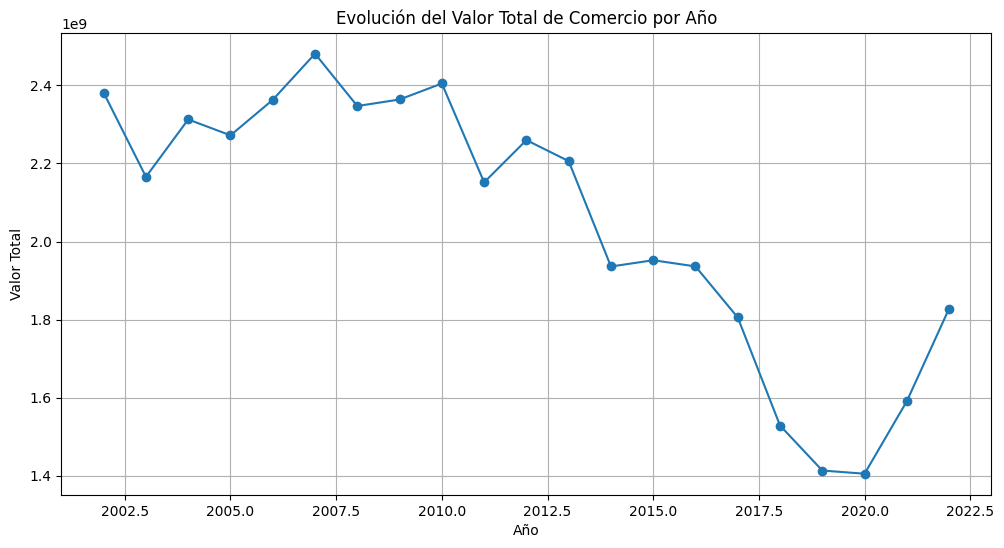

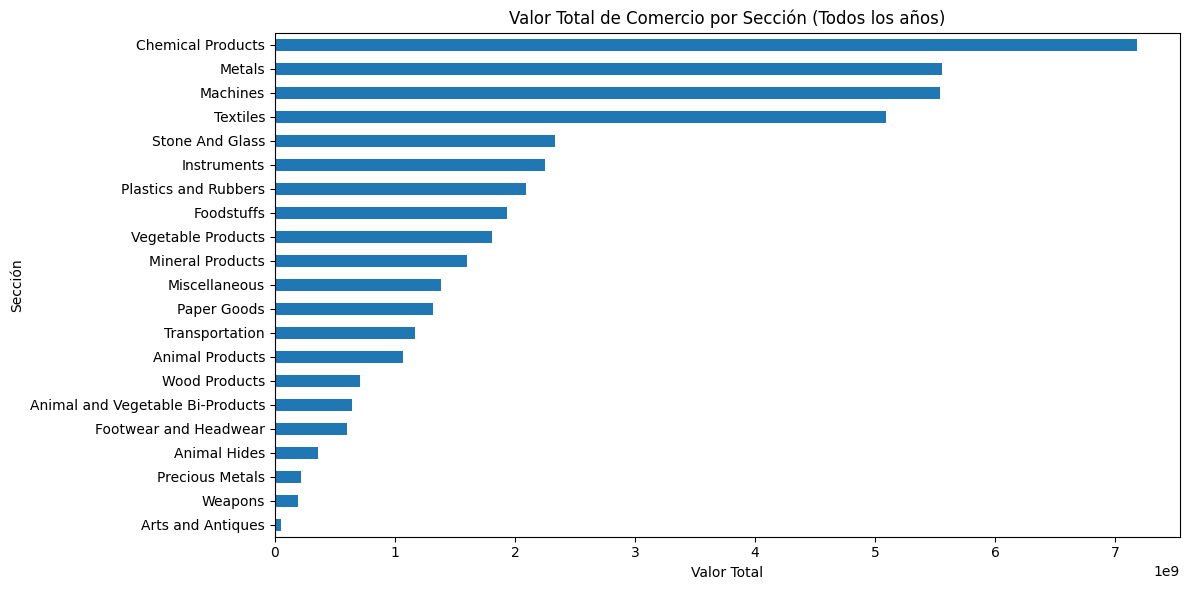

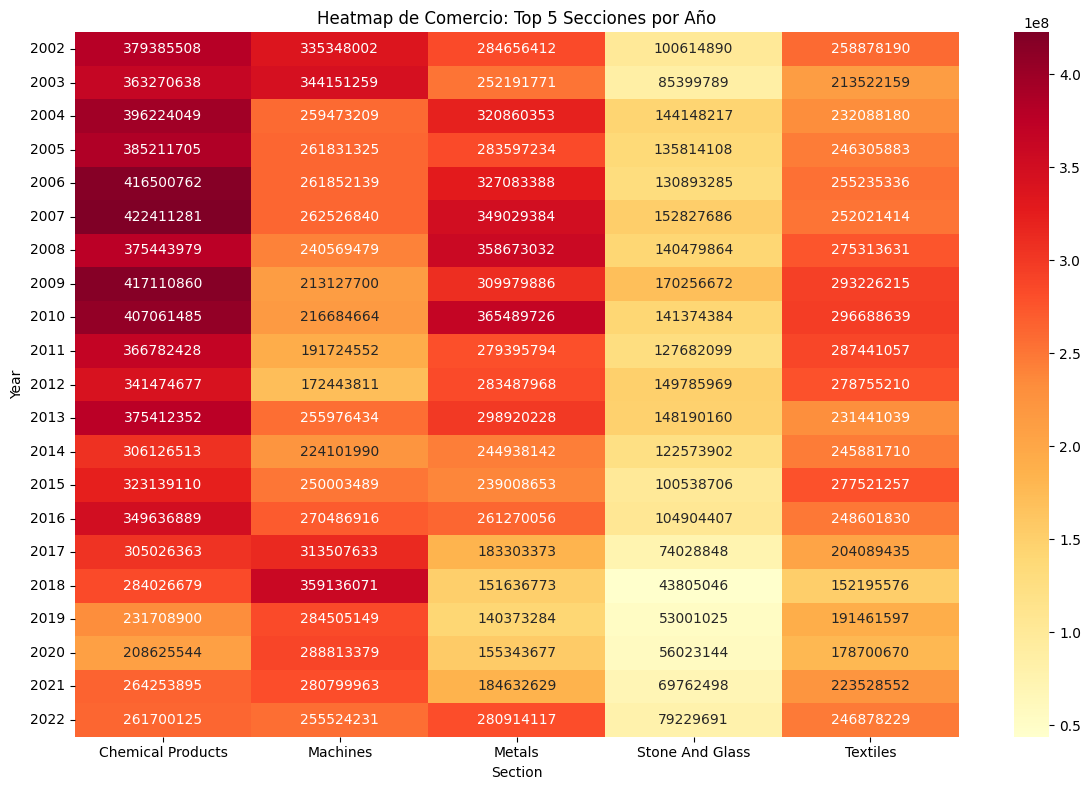

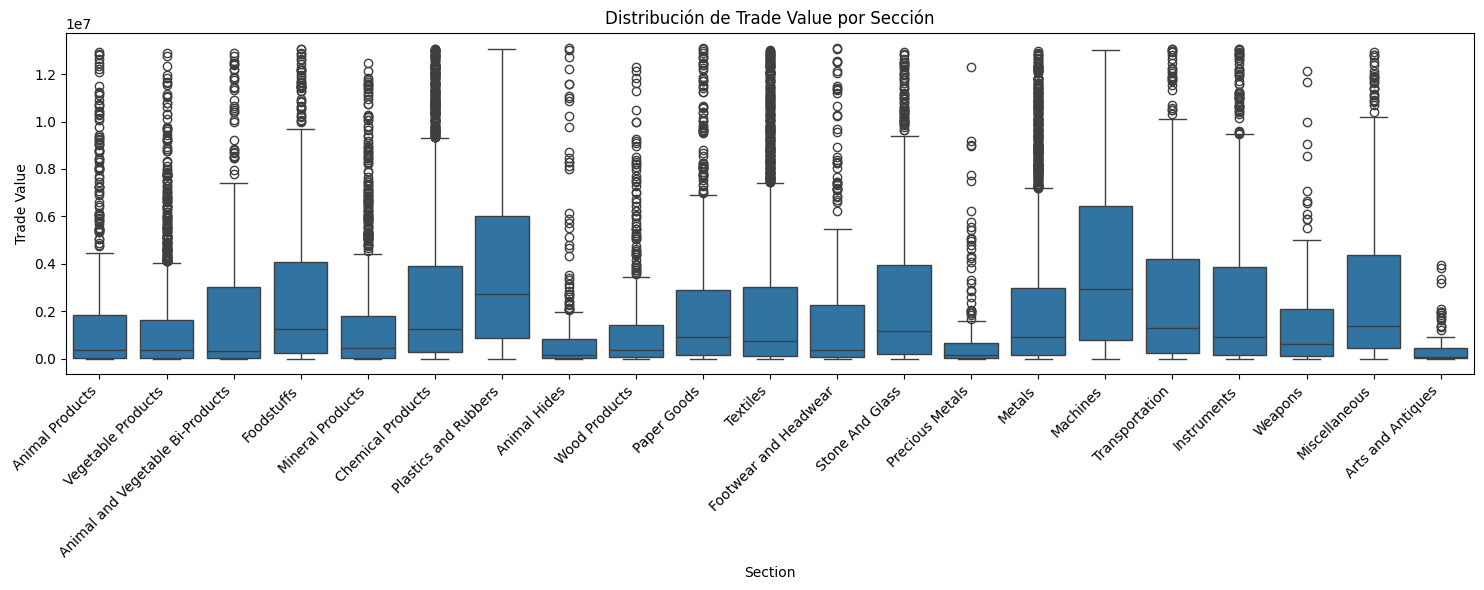


Estadísticas generales:
Año con mayor comercio: 2007 ($2,481,260,363.00)
Año con menor comercio: 2020 ($1,405,039,912.00)

Sección con mayor comercio: Chemical Products
Sección con menor comercio: Arts and Antiques


In [51]:
# 1. Evolución del comercio total por año
plt.figure(figsize=(12, 6))
analisis_por_año['Total'].plot(kind='line', marker='o')
plt.title('Evolución del Valor Total de Comercio por Año')
plt.xlabel('Año')
plt.ylabel('Valor Total')
plt.grid(True)
plt.show()

# 2. Distribución por sección
plt.figure(figsize=(12, 6))
analisis_por_seccion['Total'].sort_values(ascending=True).plot(kind='barh')
plt.title('Valor Total de Comercio por Sección (Todos los años)')
plt.xlabel('Valor Total')
plt.ylabel('Sección')
plt.tight_layout()
plt.show()

# 3. Heatmap de comercio por año y las top 5 secciones
top_5_secciones = analisis_por_seccion.nlargest(5, 'Total').index
datos_heatmap = datos[datos['Section'].isin(top_5_secciones)]
pivot_table = datos_heatmap.pivot_table(
    values='Trade Value', 
    index='Year',
    columns='Section',
    aggfunc='sum'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Heatmap de Comercio: Top 5 Secciones por Año')
plt.tight_layout()
plt.show()

# 4. Boxplot de Trade Value por sección
plt.figure(figsize=(15, 6))
sns.boxplot(data=datos, x='Section', y='Trade Value')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Trade Value por Sección')
plt.tight_layout()
plt.show()

In [54]:
# por ultimo concluimos con datos de importancia en este analisis inicial de los datos que posiblemente analizaremos y visualizaremos en el proyecto grafico y en los siguientes analisis del proyecto:

print("Estadísticas generales:")
print(f"Año con mayor comercio: {analisis_por_año['Total'].idxmax()} (${analisis_por_año['Total'].max():,.2f})")
print(f"Año con menor comercio: {analisis_por_año['Total'].idxmin()} (${analisis_por_año['Total'].min():,.2f})")

print(f"\nSección con mayor comercio: {analisis_por_seccion['Total'].idxmax()}")
print(f"Sección con menor comercio: {analisis_por_seccion['Total'].idxmin()}")

Estadísticas generales:
Año con mayor comercio: 2007 ($2,481,260,363.00)
Año con menor comercio: 2020 ($1,405,039,912.00)

Sección con mayor comercio: Chemical Products
Sección con menor comercio: Arts and Antiques
